In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
file_path = 'C:/Users/PRABHU PALANI/Desktop/heart_disease_data_with_features.csv'
heart_data = pd.read_csv(file_path)

In [3]:
# Display basic information and first few rows of the dataset
heart_data_info = heart_data.info()
heart_data_head = heart_data.head()
heart_data_columns = heart_data.columns

heart_data_info, heart_data_head, heart_data_columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    303 non-null    int64  
 1   sex                    303 non-null    int64  
 2   cp                     303 non-null    int64  
 3   trestbps               303 non-null    int64  
 4   chol                   303 non-null    int64  
 5   fbs                    303 non-null    int64  
 6   restecg                303 non-null    int64  
 7   thalach                303 non-null    int64  
 8   exang                  303 non-null    int64  
 9   oldpeak                303 non-null    float64
 10  slope                  303 non-null    int64  
 11  ca                     299 non-null    float64
 12  thal                   301 non-null    float64
 13  num                    303 non-null    int64  
 14  age_group              302 non-null    object 
 15  choles

(None,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
 0   63    1   1       145   233    1        2      150      0      2.3  ...   
 1   67    1   4       160   286    0        2      108      1      1.5  ...   
 2   67    1   4       120   229    0        2      129      1      2.6  ...   
 3   37    1   3       130   250    0        0      187      0      3.5  ...   
 4   41    0   2       130   204    0        2      172      0      1.4  ...   
 
    chol_trestbps_ratio  log_thalach_chol  symptom_zscore  \
 0             1.595890          0.919704       -0.275764   
 1             1.776398          0.828936        0.568702   
 2             1.892562          0.895083        1.572932   
 3             1.908397          0.947695        1.595755   
 4             1.557252          0.968116       -0.161647   
 
    avg_chol_by_age_group thalach_chol_diff symptom_severity_diff  \
 0             260.024691               -83             -2.532099   
 1   

In [4]:
# Selecting relevant features and target variable
# We use 'age' as the predictor and 'chol' as the target variable
heart_data = heart_data[['age', 'chol']].dropna()


In [5]:
# Splitting the data into training and testing sets
X = heart_data[['age']]
y = heart_data['chol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 3812.308600876209
R-squared: 0.05799088724535961
Coefficients: [0.92931963]
Intercept: 194.68774265549115


In [10]:
# Visualization
plt.figure(figsize=(10, 5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

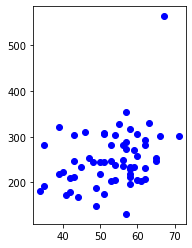

In [11]:
# Plot regression line
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')

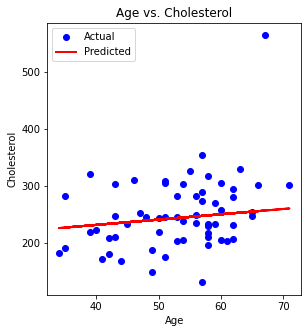

In [12]:
# Visualization
plt.figure(figsize=(10, 5))

# Plot regression line
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test.values, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()


Text(0, 0.5, 'Predicted Cholesterol')

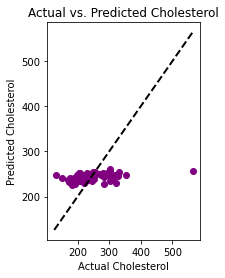

In [13]:
# Plot actual vs. predicted values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', linewidth=2)
plt.title('Actual vs. Predicted Cholesterol')
plt.xlabel('Actual Cholesterol')
plt.ylabel('Predicted Cholesterol')


In [14]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>